# Full CNN

In [8]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

# 读取数据

In [9]:
X = np.load('E:\\毕业设计\\毕业\\V0\\data\\data_processed\\X.npy')
y = np.load('E:\\毕业设计\\毕业\\V0\\data\\data_processed\\y.npy')

In [10]:
Scaler = MinMaxScaler()
X = X.reshape(-1,1)
X = Scaler.fit_transform(X)
X = X.reshape(304,1000,10,6)
y = y.reshape(-1,1)
y = Scaler.fit_transform(y)

# 建立模型

In [11]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(64,(3,3), activation='relu',padding='same', input_shape=(1000,10,6)))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
#model_1.add(layers.Lambda(lambda x: keras.backend.expand_dims(x, axis=-1)))
#model_1.add(layers.LSTM(units=128, return_sequences=True))
model_1.add(layers.Dense(128,activation='relu'))
model_1.add(layers.Dense(64,activation='relu'))
model_1.add(layers.Dense(1,activation='relu'))

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1000, 10, 64)      3520      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 500, 5, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 500, 5, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 250, 2, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 250, 2, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64000)            

In [15]:
model_1.compile(optimizer=optimizers.Adam(lr=0.0001),
               loss='mse',
               metrics=['mae']
               )

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)
model_1.fit(X,y,epochs=200,batch_size=5,callbacks=[early_stopping])

Epoch 1/200
61/61 [==============================] - 7s 111ms/step - loss: 0.1172 - mae: 0.2891
Epoch 2/200
61/61 [==============================] - 7s 109ms/step - loss: 0.0914 - mae: 0.2585
Epoch 3/200
61/61 [==============================] - 7s 120ms/step - loss: 0.0846 - mae: 0.2523
Epoch 4/200
61/61 [==============================] - 7s 118ms/step - loss: 0.0686 - mae: 0.2213
Epoch 5/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0612 - mae: 0.2066
Epoch 6/200
61/61 [==============================] - 7s 121ms/step - loss: 0.0607 - mae: 0.2038
Epoch 7/200
61/61 [==============================] - 7s 118ms/step - loss: 0.0612 - mae: 0.2052
Epoch 8/200
61/61 [==============================] - 7s 111ms/step - loss: 0.0642 - mae: 0.2096
Epoch 9/200
61/61 [==============================] - 7s 110ms/step - loss: 0.0693 - mae: 0.2180
Epoch 10/200
61/61 [==============================] - 7s 111ms/step - loss: 0.0624 - mae: 0.2043
Epoch 11/200
61/61 [===================

61/61 [==============================] - 6s 105ms/step - loss: 0.0343 - mae: 0.1422
Epoch 29/200
61/61 [==============================] - 7s 110ms/step - loss: 0.0319 - mae: 0.1432
Epoch 30/200
61/61 [==============================] - 7s 111ms/step - loss: 0.0346 - mae: 0.1430
Epoch 31/200
61/61 [==============================] - 7s 108ms/step - loss: 0.0275 - mae: 0.1275
Epoch 32/200
61/61 [==============================] - 6s 105ms/step - loss: 0.0262 - mae: 0.1235
Epoch 33/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0269 - mae: 0.1266
Epoch 34/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0249 - mae: 0.1204
Epoch 35/200
61/61 [==============================] - 7s 119ms/step - loss: 0.0277 - mae: 0.1266
Epoch 36/200
61/61 [==============================] - 7s 122ms/step - loss: 0.0218 - mae: 0.1142
Epoch 37/200
61/61 [==============================] - 8s 132ms/step - loss: 0.0208 - mae: 0.1093
Epoch 38/200
61/61 [=======================

61/61 [==============================] - 7s 110ms/step - loss: 0.0070 - mae: 0.0630
Epoch 57/200
61/61 [==============================] - 7s 109ms/step - loss: 0.0095 - mae: 0.0720
Epoch 58/200
61/61 [==============================] - 6s 106ms/step - loss: 0.0080 - mae: 0.0686
Epoch 59/200
61/61 [==============================] - 7s 122ms/step - loss: 0.0072 - mae: 0.0646
Epoch 60/200
61/61 [==============================] - 8s 128ms/step - loss: 0.0078 - mae: 0.0664
Epoch 61/200
61/61 [==============================] - 7s 118ms/step - loss: 0.0059 - mae: 0.0572
Epoch 62/200
61/61 [==============================] - 7s 118ms/step - loss: 0.0069 - mae: 0.0620
Epoch 63/200
61/61 [==============================] - 7s 118ms/step - loss: 0.0084 - mae: 0.0666
Epoch 64/200
61/61 [==============================] - 7s 122ms/step - loss: 0.0065 - mae: 0.0624
Epoch 65/200
61/61 [==============================] - 8s 126ms/step - loss: 0.0070 - mae: 0.0666
Epoch 66/200
61/61 [=======================

61/61 [==============================] - 7s 116ms/step - loss: 0.0030 - mae: 0.0422
Epoch 84/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0031 - mae: 0.0409
Epoch 85/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0028 - mae: 0.0399
Epoch 86/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0035 - mae: 0.0427
Epoch 87/200
61/61 [==============================] - 7s 117ms/step - loss: 0.0032 - mae: 0.0422
Epoch 88/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0032 - mae: 0.0425
Epoch 89/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0033 - mae: 0.0446
Epoch 90/200
61/61 [==============================] - 7s 117ms/step - loss: 0.0028 - mae: 0.0384
Epoch 91/200
61/61 [==============================] - 7s 117ms/step - loss: 0.0028 - mae: 0.0408
Epoch 92/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0025 - mae: 0.0373
Epoch 93/200
61/61 [=======================

61/61 [==============================] - 7s 115ms/step - loss: 0.0020 - mae: 0.0337
Epoch 112/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0024 - mae: 0.0368
Epoch 113/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0027 - mae: 0.0383
Epoch 114/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0035 - mae: 0.0453
Epoch 115/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0028 - mae: 0.0417
Epoch 116/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0023 - mae: 0.0367
Epoch 117/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0014 - mae: 0.0272
Epoch 118/200
61/61 [==============================] - 7s 114ms/step - loss: 0.0012 - mae: 0.0263
Epoch 119/200
61/61 [==============================] - 7s 117ms/step - loss: 0.0015 - mae: 0.0288
Epoch 120/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0017 - mae: 0.0314
Epoch 121/200
61/61 [=============

61/61 [==============================] - 7s 116ms/step - loss: 0.0017 - mae: 0.0317
Epoch 139/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0015 - mae: 0.0283
Epoch 140/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0044 - mae: 0.0493
Epoch 141/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0016 - mae: 0.0302
Epoch 142/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0015 - mae: 0.0285
Epoch 143/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0012 - mae: 0.0266
Epoch 144/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0015 - mae: 0.0288
Epoch 145/200
61/61 [==============================] - 7s 116ms/step - loss: 0.0013 - mae: 0.0270
Epoch 146/200
61/61 [==============================] - 7s 114ms/step - loss: 0.0011 - mae: 0.0261
Epoch 147/200
61/61 [==============================] - 7s 115ms/step - loss: 0.0011 - mae: 0.0255
Epoch 148/200
61/61 [=============

61/61 [==============================] - 7s 119ms/step - loss: 0.0019 - mae: 0.0340
Epoch 167/200
61/61 [==============================] - 7s 121ms/step - loss: 0.0056 - mae: 0.0507
Epoch 168/200
61/61 [==============================] - 7s 120ms/step - loss: 0.0096 - mae: 0.0742
Epoch 169/200
61/61 [==============================] - 7s 121ms/step - loss: 0.0029 - mae: 0.0397
Epoch 170/200
61/61 [==============================] - 7s 119ms/step - loss: 0.0015 - mae: 0.0299
Epoch 171/200
61/61 [==============================] - 7s 121ms/step - loss: 9.7169e-04 - mae: 0.0239
Epoch 172/200
61/61 [==============================] - 7s 119ms/step - loss: 0.0010 - mae: 0.0241
Epoch 173/200
61/61 [==============================] - 7s 120ms/step - loss: 9.7371e-04 - mae: 0.0230
Epoch 174/200
61/61 [==============================] - 7s 121ms/step - loss: 0.0012 - mae: 0.0272
Epoch 175/200
61/61 [==============================] - 7s 120ms/step - loss: 8.9837e-04 - mae: 0.0224
Epoch 176/200
61/61 [=

61/61 [==============================] - 7s 120ms/step - loss: 8.3331e-04 - mae: 0.0221
Epoch 194/200
61/61 [==============================] - 7s 114ms/step - loss: 8.1280e-04 - mae: 0.0222
Epoch 195/200
61/61 [==============================] - 7s 110ms/step - loss: 6.4681e-04 - mae: 0.0197
Epoch 196/200
61/61 [==============================] - 7s 110ms/step - loss: 9.1009e-04 - mae: 0.0235
Epoch 197/200
61/61 [==============================] - 7s 118ms/step - loss: 6.8755e-04 - mae: 0.0208
Epoch 198/200
61/61 [==============================] - 8s 129ms/step - loss: 7.7328e-04 - mae: 0.0204
Epoch 199/200
61/61 [==============================] - 8s 125ms/step - loss: 0.0023 - mae: 0.0369
Epoch 200/200
61/61 [==============================] - 7s 118ms/step - loss: 0.0017 - mae: 0.0320


In [17]:
res = model_1.predict(X)

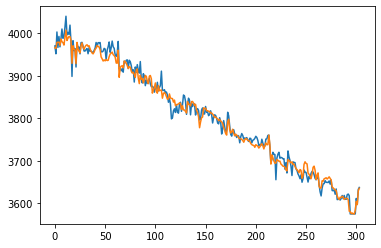

In [18]:
plt.plot(Scaler.inverse_transform(res))
plt.plot(Scaler.inverse_transform(y))

In [19]:
res = Scaler.inverse_transform(res)
res = pd.DataFrame(res)
res.to_csv('E:\\毕业设计\\毕业\\V0\\data\\容量预测结果_全CNN模型.csv',index=False,encoding="utf_8_sig")

In [20]:
model_1.save('E:\\毕业设计\\毕业\\V0\\data\model\\full_cnn.h5')

# CNN+LSTM混合模型

混合模型需要训练好长时间才能效果好，至少要几百个轮次

In [ ]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.layers import concatenate, LSTM, Conv1D, Conv2D, Flatten, TimeDistributed, Input, Dense, MaxPooling1D, MaxPooling2D, Dropout, Activation
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [ ]:
X = np.load('E:\\毕业设计\\毕业\\V0\\data\\data_processed\\X.npy')
y = np.load('E:\\毕业设计\\毕业\\V0\\data\\data_processed\\y.npy')

In [ ]:
Scaler = MinMaxScaler()
X = X.reshape(-1,1)
X = Scaler.fit_transform(X)
X = X.reshape(304,1000,10,6)
y = y.reshape(-1,1)
y = Scaler.fit_transform(y)

In [ ]:
#X = np.expand_dims(X, axis=-1)
#X.shape

In [ ]:
model_2 = models.Sequential()

In [ ]:
model_2.add(TimeDistributed(Conv1D(64,9, activation='relu',padding='same', input_shape=(1000,10,6))))

In [ ]:
model_2.add(TimeDistributed(MaxPooling1D()))

In [ ]:
model_2.add(TimeDistributed(Conv1D(128,9, activation='relu',padding='same')))

In [ ]:
model_2.add(TimeDistributed(MaxPooling1D()))

In [ ]:
model_2.add(TimeDistributed(Conv1D(128,9, activation='relu',padding='same')))

In [ ]:
model_2.add(TimeDistributed(Flatten())) 

In [ ]:
model_2.add(Dropout(0.5)) 

In [ ]:
model_2.add(LSTM(units=128, return_sequences=True))

In [ ]:
model_2.add(LSTM(units=50, return_sequences=False))

In [ ]:
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
model_2.add(Dense(1,activation='relu'))

In [ ]:
model_2.compile(optimizer=optimizers.Adam(lr=0.0001),
               loss='mse',
               metrics=['mae'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)
model_2.fit(X,y,epochs=1,batch_size=5,callbacks=[early_stopping])

In [ ]:
res = model.predict(X)

In [ ]:
plt.plot(Scaler.inverse_transform(res))
plt.plot(Scaler.inverse_transform(y))

In [ ]:
res = Scaler.inverse_transform(res)
res = pd.DataFrame(res)
res.to_csv('E:\\毕业设计\\毕业\\V0\\data\\容量预测结果_混合模型.csv',index=False,encoding="utf_8_sig")

In [ ]:
model_2.save('E:\\毕业设计\\毕业\\V0\\data\model\\cnn+lstm.h5')